In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helpers import save_data
from cleaner import clean_data

In [4]:
SUBSET_POS = 'data/train_pos.txt'
SUBSET_NEG = 'data/train_neg.txt'

DATA_POS = 'data/train_pos_full.txt'
DATA_NEG = 'data/train_neg_full.txt'
TEST_DATA = 'data/test_data.txt'

CLEAN_DATA_POS = 'data/train_pos_full_clean.txt'
CLEAN_DATA_NEG = 'data/train_neg_full_clean.txt'
CLEAN_TEST = 'data/test_data_clean.txt'

# Data Exploration

In [3]:
# Loading data
pos = pd.read_csv(DATA_POS, header=None, delimiter="\n", names=["tweets"])
neg = pd.read_csv(DATA_NEG, header=None, delimiter="\n", names=["tweets"])
test = pd.read_csv(TEST_DATA, header=None, delimiter="\n", names=["tweets"])

In [4]:
# Dimension of the data

# Positive
print("Positive tweets, number of tweets:", pos.shape[0])

# Negative
print("Negative tweets, number of tweets:", neg.shape[0])

# Test data
print("Test data tweets, number of tweets:", test.shape[0])

Positive tweets, number of tweets: 1216259
Negative tweets, number of tweets: 1238237
Test data tweets, number of tweets: 10000


In [5]:
# Mean of the number of words per tweet

# Positive
num_words = pos["tweets"].str.split().str.len()
print("Positive tweets, mean of the number of words per tweet:", np.mean(num_words))

# Negative
num_words = neg["tweets"].str.split().str.len()
print("Negative tweets, mean of the number of words per tweet:", np.mean(num_words))

# Test data
num_words = test["tweets"].str.split().str.len()
print("Test data tweets, mean of the number of words per tweet:", np.mean(num_words))

Positive tweets, mean of the number of words per tweet: 14.680184072635845
Negative tweets, mean of the number of words per tweet: 17.26942499699169
Test data tweets, mean of the number of words per tweet: 15.6988


In [6]:
# Median of the number of words per tweet

# Positive
num_words = pos["tweets"].str.split().str.len()
print("Positive tweets, median of the number of words per tweet:", np.median(num_words))

# Negative
num_words = neg["tweets"].str.split().str.len()
print("Negative tweets, median of the number of words per tweet:", np.median(num_words))

# Test data
num_words = test["tweets"].str.split().str.len()
print("Test data tweets, median of the number of words per tweet:", np.median(num_words))

Positive tweets, median of the number of words per tweet: 13.0
Negative tweets, median of the number of words per tweet: 18.0
Test data tweets, median of the number of words per tweet: 15.0


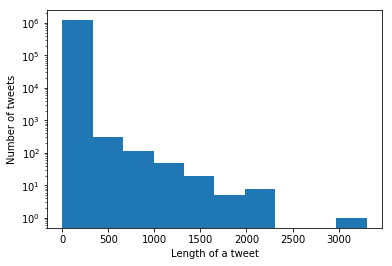

In [7]:
# Plot the distribution of the length of the tweets

lengths = pos["tweets"].apply(lambda x: len(x.split()))
plt.hist(lengths, log=True)
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets')
plt.show()

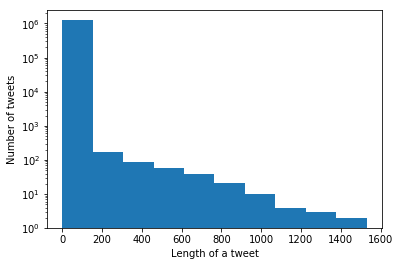

In [8]:
lengths = neg["tweets"].apply(lambda x: len(x.split()))
plt.hist(lengths, log=True)
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets')
plt.show()

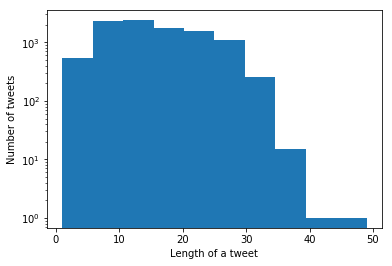

In [9]:
lengths = test["tweets"].apply(lambda x: len(x.split()))
plt.hist(lengths, log=True)
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets')
plt.show()

In [10]:
# Plot sentiment distribution

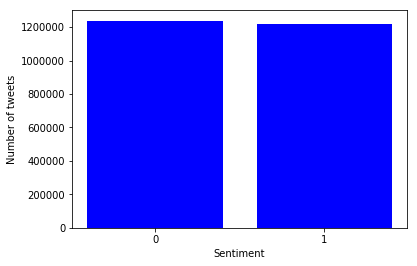

In [11]:
from collections import Counter

labels = [1] * pos.shape[0] + [0] * neg.shape[0]
count_map = Counter(labels)
counts = [count_map[i] for i in range(2)]
plt.bar(np.arange(2), counts, width=0.8, color='b')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.xticks(np.arange(2), np.arange(2))
plt.show()

In [12]:
# Plot frequency distribution of words

In [13]:
def plot_freq_word(df):

    all_words = []
    for t in df.tweets.values:
        for w in t.split():
            if len(w) > 2:
                all_words.append(w)

    all_words_df = pd.Series(all_words)
    words_count = pd.DataFrame(all_words_df.groupby(all_words_df.values).count().sort_values(ascending=False)).reset_index()
    words_count.columns = ["word", "count"]
    words_count.head(20).plot.bar(x="word", y="count")

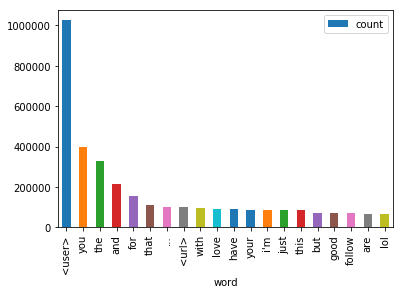

In [14]:
# Positive tweets
plot_freq_word(pos)

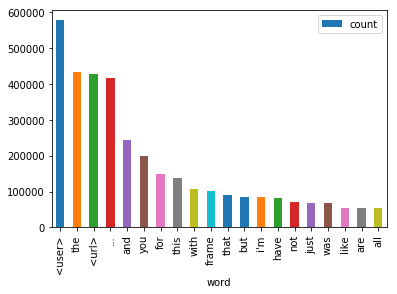

In [15]:
# Negative tweets
plot_freq_word(neg)

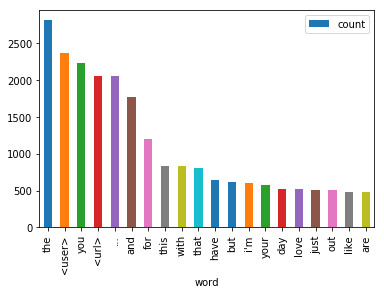

In [16]:
# Test tweets
plot_freq_word(test)

# Data cleaning

In [5]:
# Clean data
clean_pos = clean_data(DATA_POS)
clean_neg = clean_data(DATA_NEG)
clean_test = clean_data(TEST_DATA, drop_dup = False)

In [6]:
# Save data
save_data(clean_pos, CLEAN_DATA_POS)
save_data(clean_neg, CLEAN_DATA_NEG)
save_data(clean_test, CLEAN_TEST)

In [7]:
# Assignment for re-analysis of the data
pos = clean_pos
neg = clean_neg
test = clean_test

In [8]:
# Dimension of the data

# Positive
print("Positive tweets, number of tweets:", pos.shape[0])

# Negative
print("Negative tweets, number of tweets:", neg.shape[0])

# Test data
print("Test data tweets, number of tweets:", test.shape[0])

Positive tweets, number of tweets: 1013578
Negative tweets, number of tweets: 1042246
Test data tweets, number of tweets: 10000


In [10]:
# Mean of the number of words per tweet

# Positive
num_words = pos["tweet"].str.split().str.len()
print("Positive tweets, mean of the number of words per tweet:", np.mean(num_words))

# Negative
num_words = neg["tweet"].str.split().str.len()
print("Negative tweets, mean of the number of words per tweet:", np.mean(num_words))

# Test data
num_words = test["tweet"].str.split().str.len()
print("Test data tweets, mean of the number of words per tweet:", np.mean(num_words))

Positive tweets, mean of the number of words per tweet: 6.727587812679438
Negative tweets, mean of the number of words per tweet: 8.034750912932264
Test data tweets, mean of the number of words per tweet: 5.2736


In [11]:
# Median of the number of words per tweet

# Positive
num_words = pos["tweet"].str.split().str.len()
print("Positive tweets, median of the number of words per tweet:", np.median(num_words))

# Negative
num_words = neg["tweet"].str.split().str.len()
print("Negative tweets, median of the number of words per tweet:", np.median(num_words))

# Test data
num_words = test["tweet"].str.split().str.len()
print("Test data tweets, median of the number of words per tweet:", np.median(num_words))

Positive tweets, median of the number of words per tweet: 6.0
Negative tweets, median of the number of words per tweet: 8.0
Test data tweets, median of the number of words per tweet: 5.0


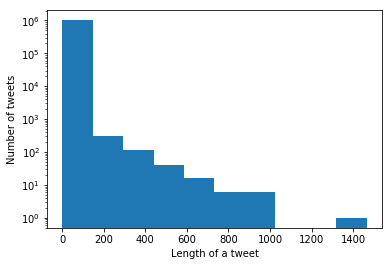

In [12]:
# Plot the distribution of the length of the tweets

lengths = pos["tweet"].apply(lambda x: len(x.split()))
plt.hist(lengths, log=True)
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets')
plt.show()

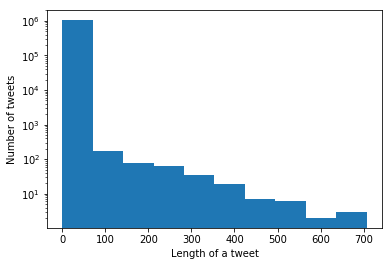

In [13]:
lengths = neg["tweet"].apply(lambda x: len(x.split()))
plt.hist(lengths, log=True)
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets')
plt.show()

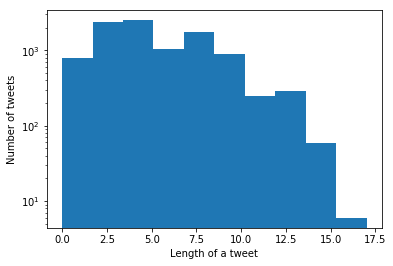

In [14]:
lengths = test["tweet"].apply(lambda x: len(x.split()))
plt.hist(lengths, log=True)
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets')
plt.show()

In [10]:
# Plot sentiment distribution

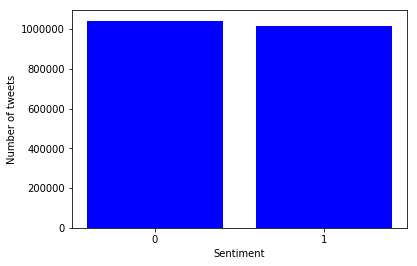

In [15]:
from collections import Counter

labels = [1] * pos.shape[0] + [0] * neg.shape[0]
count_map = Counter(labels)
counts = [count_map[i] for i in range(2)]
plt.bar(np.arange(2), counts, width=0.8, color='b')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.xticks(np.arange(2), np.arange(2))
plt.show()

In [12]:
# Plot frequency distribution of words

In [17]:
def plot_freq_word(df):

    all_words = []
    for t in df.tweet.values:
        for w in t.split():
            if len(w) > 2:
                all_words.append(w)

    all_words_df = pd.Series(all_words)
    words_count = pd.DataFrame(all_words_df.groupby(all_words_df.values).count().sort_values(ascending=False)).reset_index()
    words_count.columns = ["word", "count"]
    words_count.head(20).plot.bar(x="word", y="count")

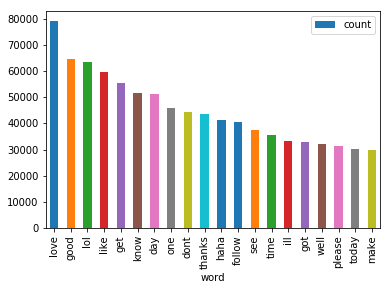

In [18]:
# Positive tweets
plot_freq_word(pos)

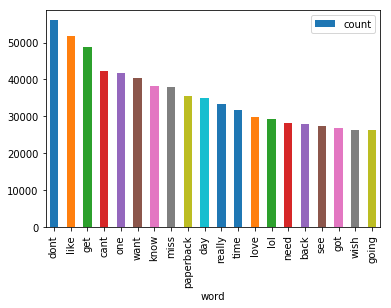

In [19]:
# Negative tweets
plot_freq_word(neg)

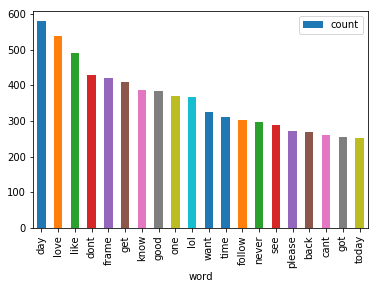

In [20]:
# Test tweets
plot_freq_word(test)